In [675]:
#Customer Segmentation Analysis
#Enkhchimeg Tsendnyam

In [676]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [677]:
 #Load data into dataframe
data = pd.read_csv("/Users/Nathaniel/Downloads/MegTsendnyam/DSC 680 - Week 1-4 assignments/marketing_data.csv")

In [678]:
#Check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (2240, 28)


In [679]:
#Display the data first 5 rows using head()
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [680]:
#Check the data type
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object

In [672]:
pd.set_option('max_columns', None)

In [681]:
#describe the data
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [682]:
#pull out the objects dtypes attributes & show their count/frequency/max/quartiles
print("Summarized Data")
print(data.describe(include=['O']))

Summarized Data
         Education Marital_Status Dt_Customer Country
count         2240           2240        2240    2240
unique           5              8         663       8
top     Graduation        Married   8/31/2012      SP
freq          1127            864          12    1095


In [683]:
#check the number of unique values
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [684]:
#check if there is any missing values
data.isnull().values.any()

True

In [685]:
#determine columns with missing values
data.loc[:, data.isnull().any()].columns

Index(['Income'], dtype='object')

In [686]:
#check how many missing values in my dataframe
data.isna().sum().sum()

24

In [552]:
#Data Cleaning
#find the median of Income
inc_med = data['Income'].median()

In [553]:
#fill in the missing values on Income
data['Income'].fillna(inc_med, inplace=True)

In [554]:
#make Income's data type intiger
data['Income'] = data['Income'].astype(int)

In [555]:
#confirm there is no missing values now
data.isnull().values.any()

False

In [556]:
#make the 'age' variable, by subtracting birth year from 2021
data['Age'] = (2021 - data['Year_Birth']).astype(np.int64)

In [557]:
# Check for duplicate data
data.duplicated().sum()

0

In [558]:
# Adjust the data format of the registration date to the date format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [559]:
#Customer Date Info
dates = []

for i in data['Dt_Customer']:
    i = i.date()   
    dates.append(i)
    
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))   

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [560]:
#Drop unncessary column ID
dropping = ["ID"]
data = data.drop(dropping, axis = 1)

In [561]:
#Rename some of the columns
data = data.rename(columns={'MntWines': 'Wines', 'MntFruits':'Fruits',
                           'MntMeatProducts':'Meat', 'MntFishProducts':'Fish',
                           'MntSweetProducts':'Sweets', 'MntGoldProds':'Gold'})

In [562]:
#calculate customers' total spend
data['Total_Spend'] = data["Wines"] + data["Fruits"] + data["Meat"] + data["Fish"] + data["Sweets"] + data['Gold']

In [563]:
#Clculate the total AcceptedCmp
data["Total_AcceptedCmp"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]

In [564]:
#Create a Children column
data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Has_Child"] = np.where(data.Children >0, 'Has child', 'No child')

In [565]:
data.tail()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total_Spend,Total_AcceptedCmp,Children,Has_Child
2235,1976,PhD,Divorced,66476,0,1,2013-03-07,99,372,18,...,0,0,0,0,US,45,689,0,1,Has child
2236,1977,2n Cycle,Married,31056,1,0,2013-01-22,99,5,10,...,0,0,0,0,SP,44,55,0,1,Has child
2237,1976,Graduation,Divorced,46310,1,0,2012-12-03,99,185,2,...,0,0,0,0,SP,45,309,0,1,Has child
2238,1978,Graduation,Married,65819,0,0,2012-11-29,99,267,38,...,0,0,0,0,IND,43,1383,0,0,No child
2239,1969,PhD,Married,94871,0,2,2012-09-01,99,169,24,...,0,0,1,0,CA,52,1078,2,2,Has child


In [214]:
#EDA

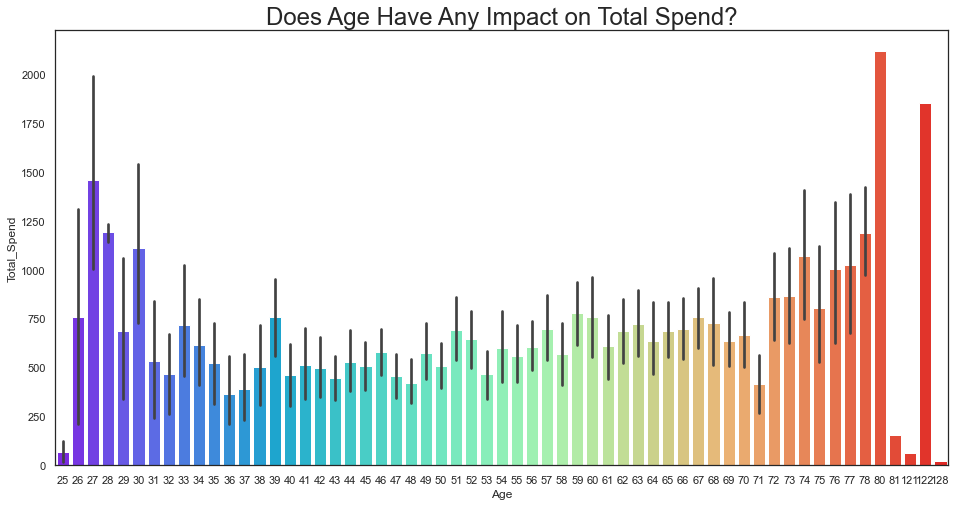

In [215]:
sns.set_theme(style="white")
plt.figure(figsize=(16,8))
plt.title("Does Age Have Any Impact on Total Spend?",fontsize=24)
ax = sns.barplot(x="Age", y="Total_Spend", data=data,palette="rainbow")

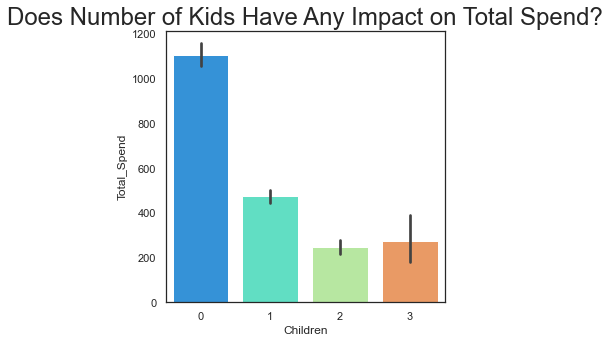

In [216]:
sns.set_theme(style="white")
plt.figure(figsize=(5,5))
plt.title("Does Number of Kids Have Any Impact on Total Spend?",fontsize=24)
ax = sns.barplot(x="Children", y="Total_Spend", data=data,palette="rainbow")

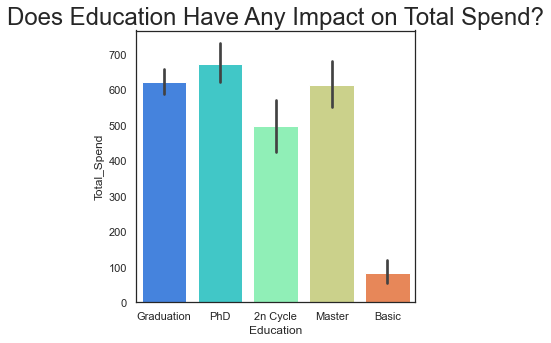

In [217]:
sns.set_theme(style="white")
plt.figure(figsize=(5,5))
plt.title("Does Education Have Any Impact on Total Spend?",fontsize=24)
ax = sns.barplot(x="Education", y="Total_Spend", data=data,palette="rainbow")

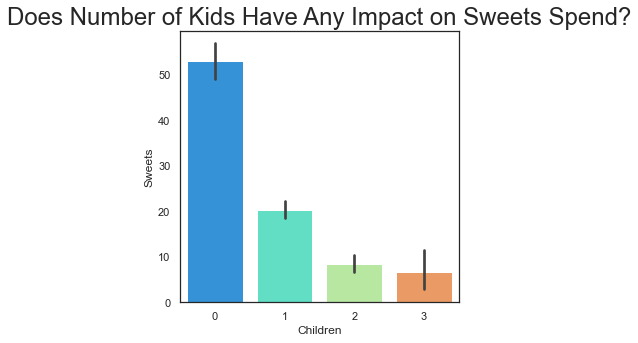

In [218]:
sns.set_theme(style="white")
plt.figure(figsize=(5,5))
plt.title("Does Number of Kids Have Any Impact on Sweets Spend?",fontsize=24)
ax = sns.barplot(x="Children", y="Sweets", data=data,palette="rainbow")

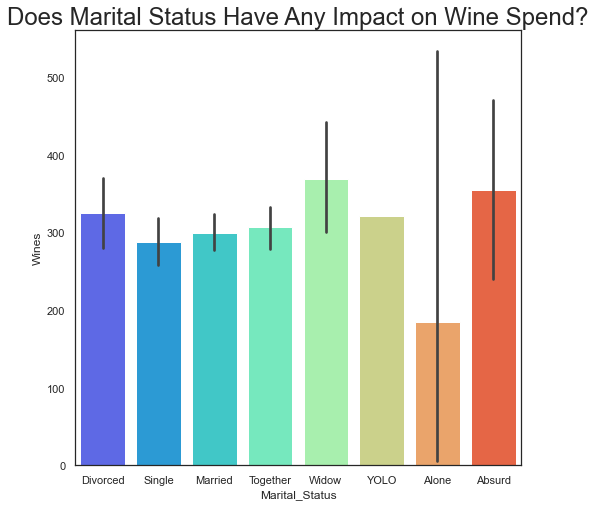

In [219]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("Does Marital Status Have Any Impact on Wine Spend?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Wines", data=data,palette="rainbow")

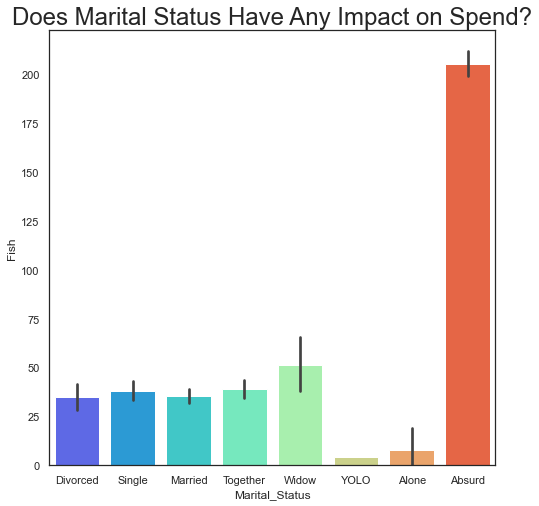

In [220]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("Does Marital Status Have Any Impact on Spend?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Fish", data=data,palette="rainbow")

In [221]:
#Histograms to show the frequency of quantative variables

# set up the figure size (20 for the y axis & 10 for the x axis)
plt.rcParams['figure.figsize'] = (35, 55)

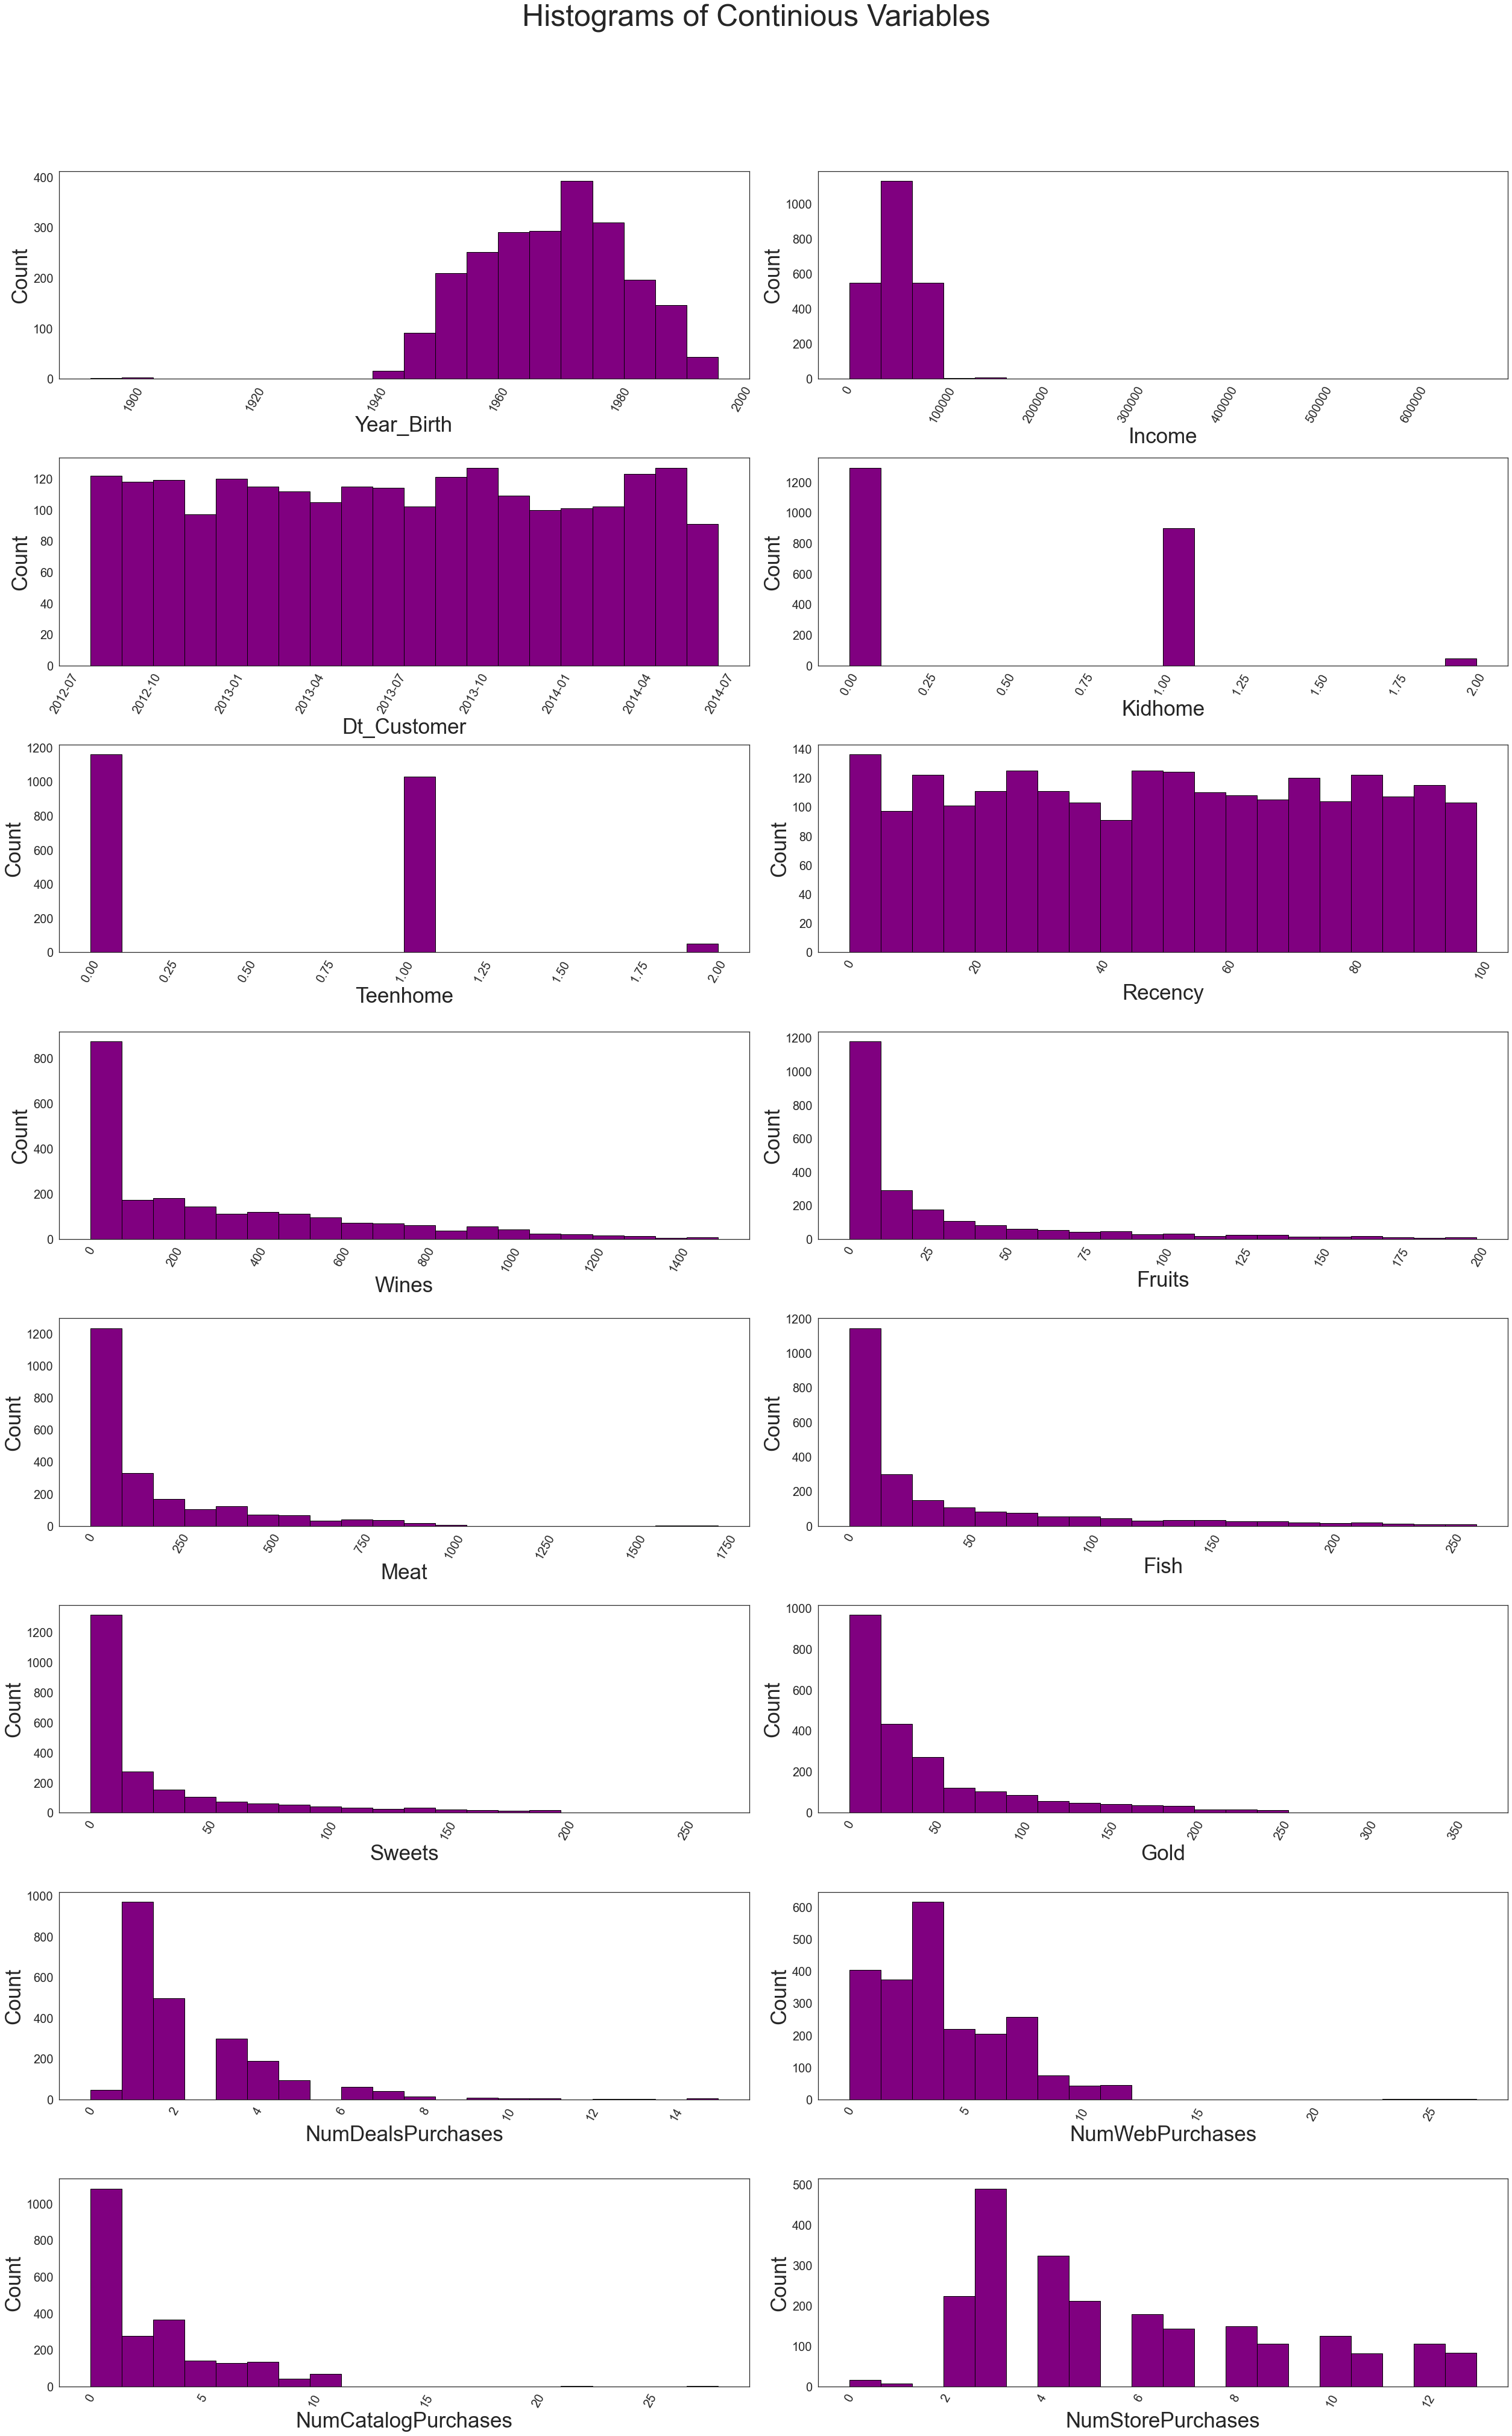

In [222]:
# Specify the features of interest (pick the columns to be analyzed)
num_features = ['Year_Birth', 'Income', 'Dt_Customer', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
xaxes = num_features #put the chosen features into x axis 
yaxes = ['Count', 'Count', 'Count', 'Count', 'Count', 'Count','Count', 'Count', 'Count', 'Count', 'Count', 'Count','Count', 'Count', 'Count', 'Count', 'Count', 'Count', 'Count', 'Count'] #count the values of chosen features

# draw histograms - make subplots 2 in columns & 8 in rows
fig, axes = plt.subplots(nrows = 8, ncols = 2, constrained_layout=False)
plt.suptitle("Histograms of Continious Variables", fontsize=50, y=1.02)

axes = axes.ravel() #return only axes
for idx, ax in enumerate(axes): #write enumerate() in a loop to count the iterable object
    ax.hist(data[num_features[idx]].dropna(), bins=20, color = 'purple', edgecolor = 'black') #plot histogram using the chosen features 
    ax.set_xlabel(xaxes[idx], fontsize=35)#set the x label with the fontsize
    ax.set_ylabel(yaxes[idx], fontsize=35) #set the y label with the fontsize
    ax.tick_params(axis='both', labelsize=20) #set the tick parameters for both axis and set the label size
    ax.tick_params(axis = 'x', rotation = 60)
    ax.grid(False)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()  #show the plot




In [223]:
#put categorical variables into one group
categoricals = ["Education", 'Marital_Status', "Kidhome", "Teenhome", "Complain", "Response",
                "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Country"]

In [224]:
def set_xticklabels_rotation(ax,rotation = 20): 
    for label in ax.get_xticklabels():
        label.set_rotation(rotation)
        label.set_horizontalalignment('right')

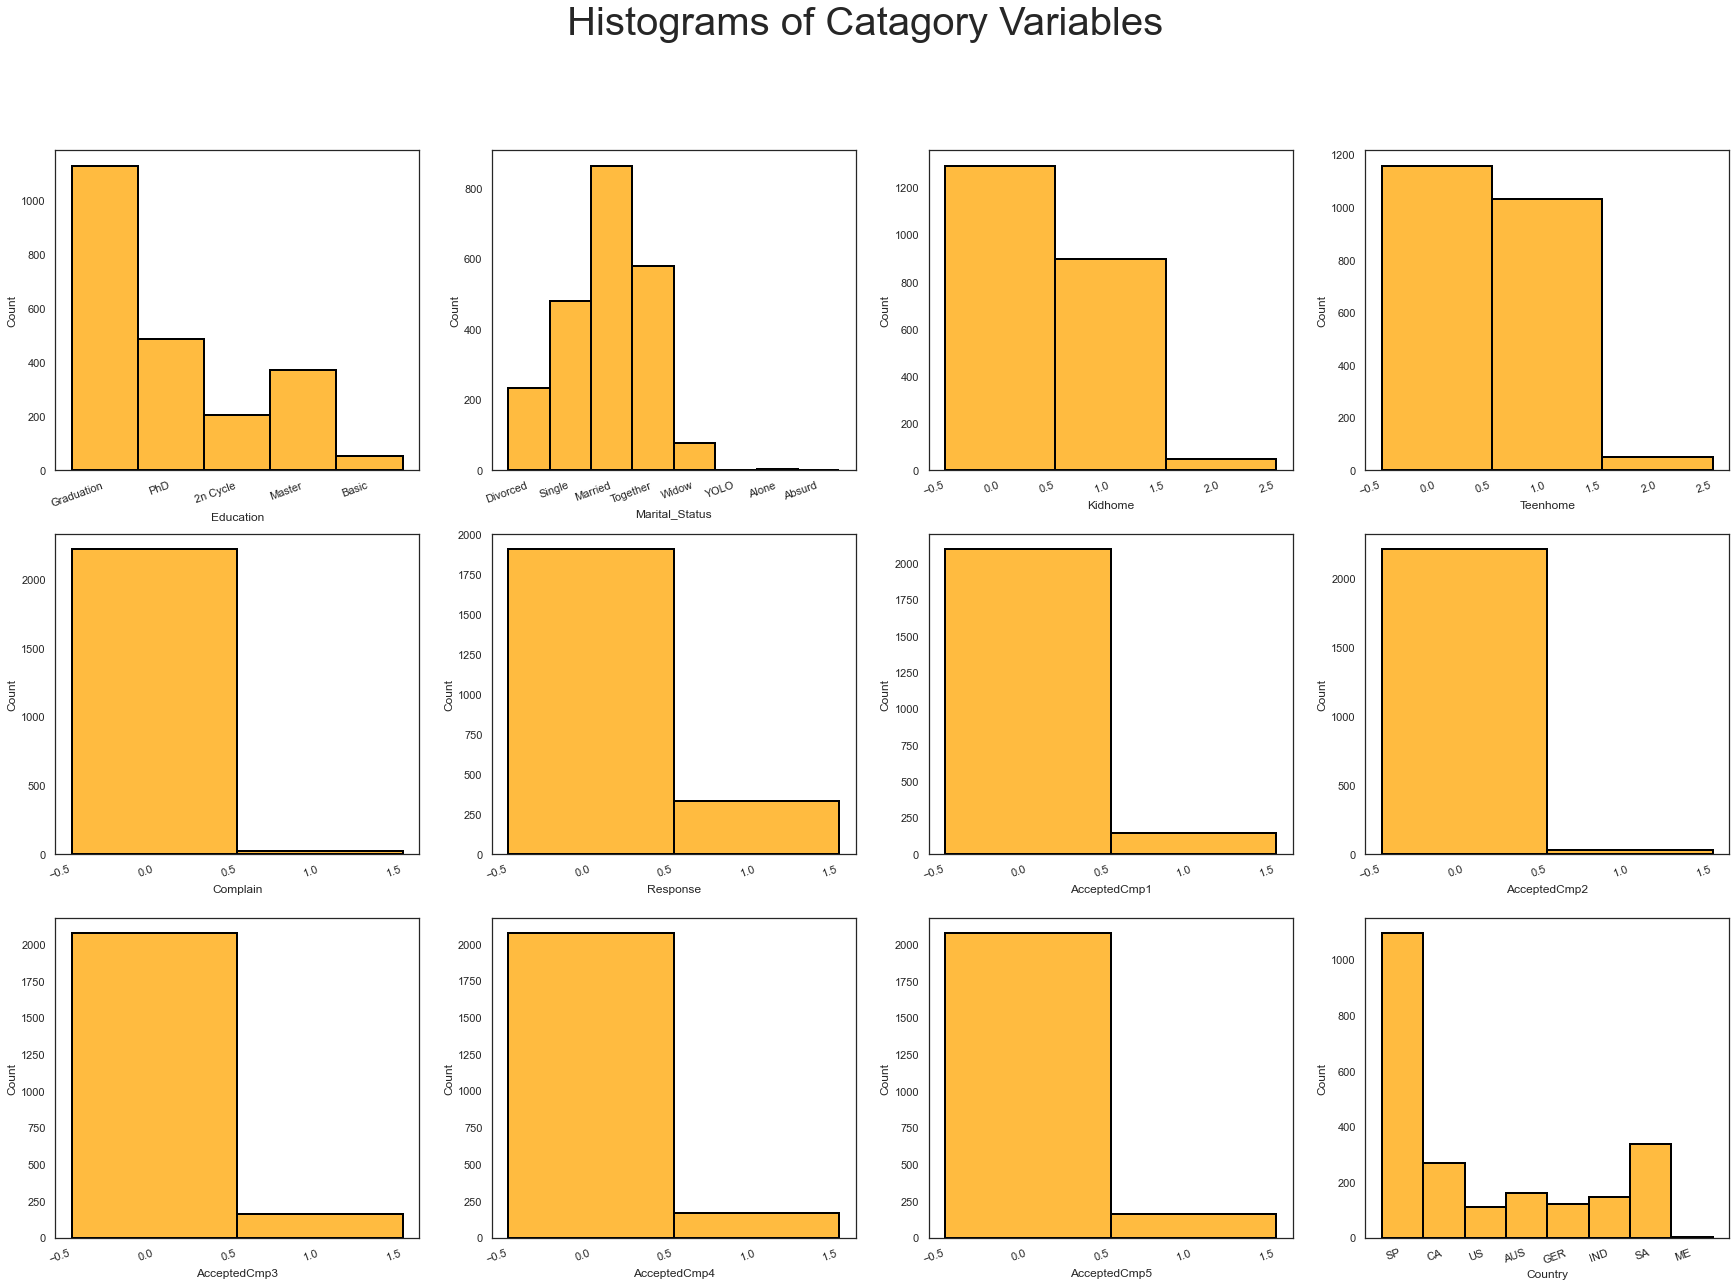

In [225]:
_, ax1 = plt.subplots(3,4, figsize=(30,20))
plt.suptitle('Histograms of Catagory Variables', size = 40)
for i, col in enumerate(categoricals):
    sns.histplot(x=col, data=data,  ax=ax1[i//4, i%4],discrete=True, edgecolor = 'black', linewidth = '2', color = 'orange')
    set_xticklabels_rotation(ax1[i//4, i%4])
    sns.set(font_scale = 1.5)
    sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()

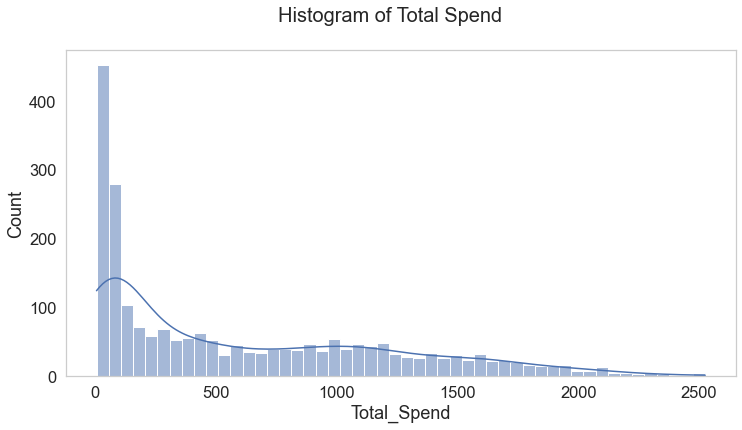

In [226]:
plt.figure(figsize=(12,6))
plt.suptitle("Histogram of Total Spend", fontsize=20)
sns.histplot(data['Total_Spend'], bins=50, kde=True)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

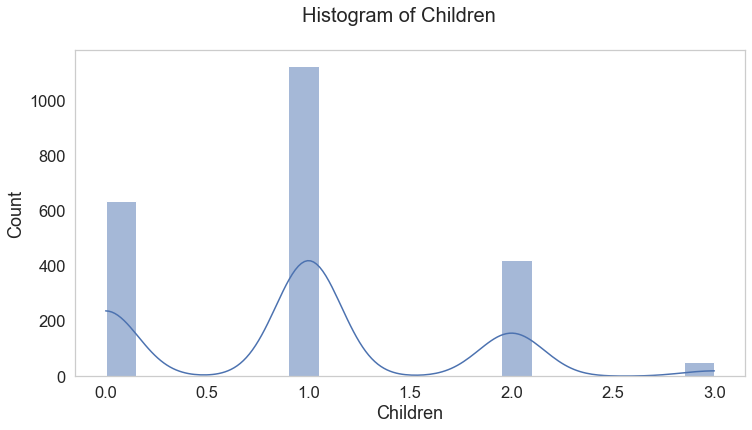

In [227]:
plt.figure(figsize=(12,6))
plt.suptitle("Histogram of Children", fontsize=20)
sns.histplot(data['Children'], kde=True)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

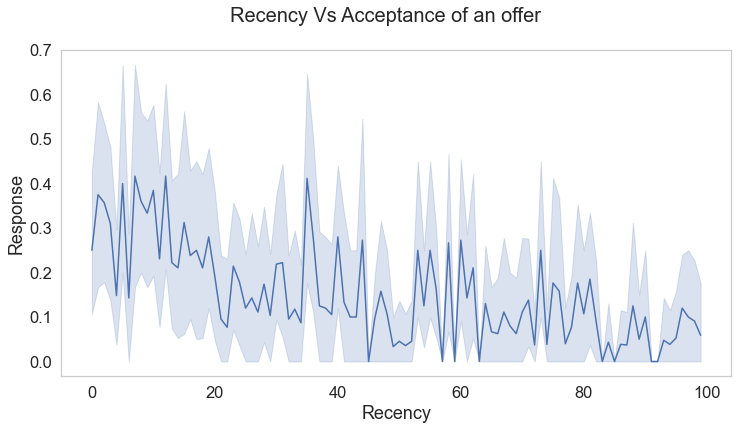

In [228]:
# The relationship between the number of days since the user’s last purchase and whether the offer was accepted in the last activity
plt.figure(figsize=(12,6))
plt.suptitle('Recency Vs Acceptance of an offer', fontsize=20)
sns.lineplot(x='Recency', y='Response', data=data)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

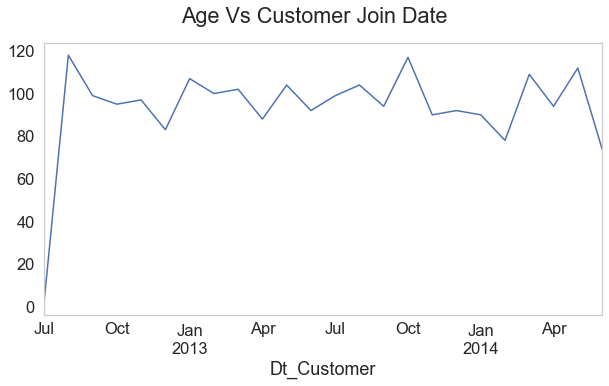

In [229]:
#The relationship between customers' age and the date they joined 
groupedDate = data.set_index('Dt_Customer')
groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(10,5))
plt.suptitle('Age Vs Customer Join Date')
groupedDate.Age.plot(kind='line')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

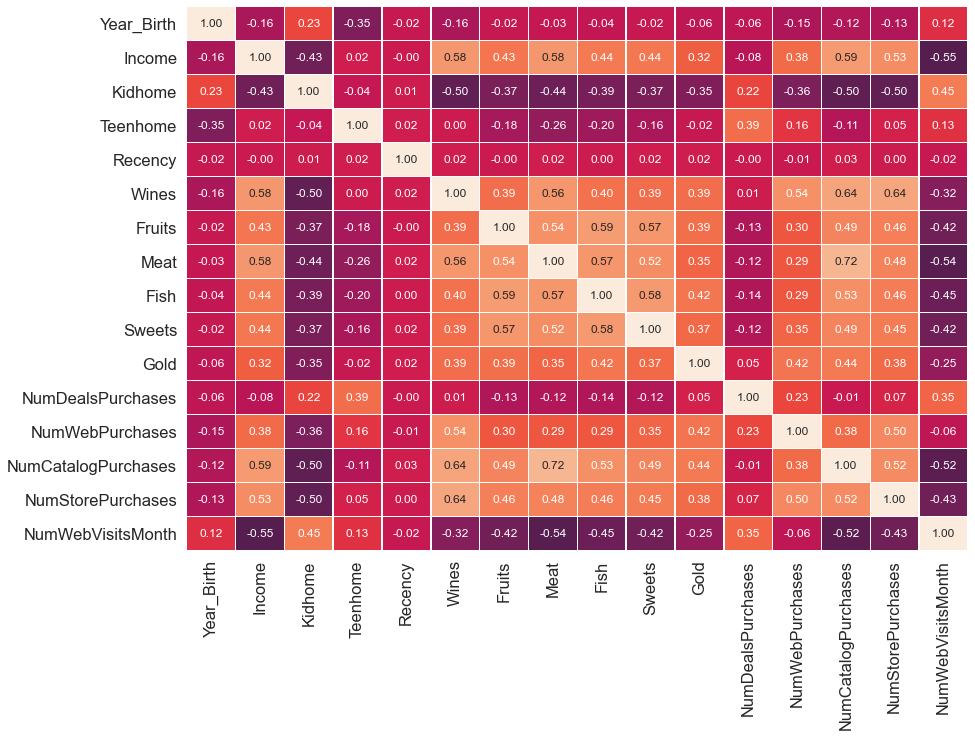

In [230]:
plt.figure(figsize=(14,10))
ax = sns.heatmap(data[num_features].corr(), annot=True, annot_kws={"fontsize":12}, fmt=".2f", vmin=-1,  linewidths=.5, cbar=False)
plt.show()

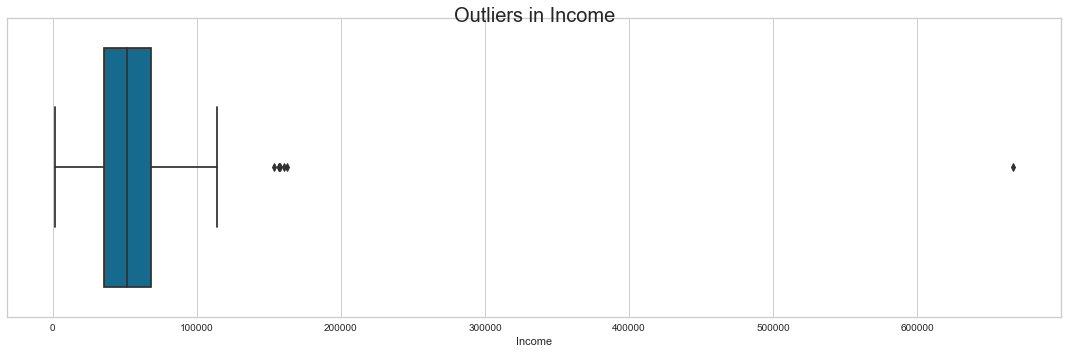

In [566]:
#Detect outliers
#income
fig = plt.figure(figsize=(15,5))
plt.suptitle("Outliers in Income", fontsize=20)
ax = sns.boxplot(x= 'Income', data = data)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

In [567]:
#use z-score to detect outliers
z = np.abs(stats.zscore(data['Income']))
print(z)

[1.30219529 0.1938702  0.6003839  ... 0.23681221 0.54253879 1.70311623]


In [568]:
#defining a treshhold to identify an outlier
threshhold = 3
print(np.where(z > 3))

(array([ 325,  497,  527,  731,  853, 1826, 1925, 2204], dtype=int64),)


In [569]:
print(data[['Income']].iloc[325])
print(data[['Income']].iloc[497])
print(data[['Income']].iloc[527])
print(data[['Income']].iloc[731])
print(data[['Income']].iloc[853])
print(data[['Income']].iloc[1826])
print(data[['Income']].iloc[1925])
print(data[['Income']].iloc[2204])

Income    157146
Name: 325, dtype: int32
Income    160803
Name: 497, dtype: int32
Income    666666
Name: 527, dtype: int32
Income    162397
Name: 731, dtype: int32
Income    157733
Name: 853, dtype: int32
Income    153924
Name: 1826, dtype: int32
Income    156924
Name: 1925, dtype: int32
Income    157243
Name: 2204, dtype: int32


In [570]:
median_income = data["Income"].median()
print(median_income)

51381.0


In [574]:
#impute them with median Income
data.at[325,'Income']='51381'
data.at[497,'Income']='51381'
data.at[527,'Income']='51381'
data.at[731,'Income']='51381'
data.at[853,'Income']='51381'
data.at[1826,'Income']='51381'
data.at[1925,'Income']='51381'
data.at[2204,'Income']='51381'

In [576]:
print(data[['Income']].iloc[325])
print(data[['Income']].iloc[497])
print(data[['Income']].iloc[527])
print(data[['Income']].iloc[731])
print(data[['Income']].iloc[853])
print(data[['Income']].iloc[1826])
print(data[['Income']].iloc[1925])
print(data[['Income']].iloc[2204])

Income    51381
Name: 325, dtype: int32
Income    51381
Name: 497, dtype: int32
Income    51381
Name: 527, dtype: int32
Income    51381
Name: 731, dtype: int32
Income    51381
Name: 853, dtype: int32
Income    51381
Name: 1826, dtype: int32
Income    51381
Name: 1925, dtype: int32
Income    51381
Name: 2204, dtype: int32


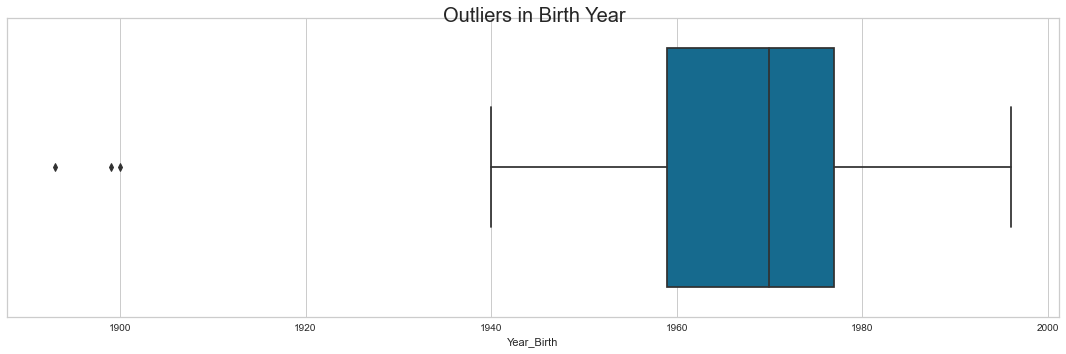

In [577]:
#Detect outliers
#income
fig = plt.figure(figsize=(15,5))
plt.suptitle("Outliers in Birth Year", fontsize=20)
ax = sns.boxplot(x= 'Year_Birth', data = data)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

In [578]:
#use z-score to detect outliers
z = np.abs(stats.zscore(data['Year_Birth']))
print(z)

[0.09967091 0.65149376 0.90188199 ... 0.60044736 0.76737284 0.01620817]


In [579]:
#defining a treshhold to identify an outlier
threshhold = 3
print(np.where(z > 3))

(array([ 513,  827, 2233], dtype=int64),)


In [580]:
print(data[['Year_Birth']].iloc[513])
print(data[['Year_Birth']].iloc[827])
print(data[['Year_Birth']].iloc[2233])

Year_Birth    1893
Name: 513, dtype: int64
Year_Birth    1899
Name: 827, dtype: int64
Year_Birth    1900
Name: 2233, dtype: int64


In [581]:
median_birthyear = data["Year_Birth"].median()
print(median_birthyear)

1970.0


In [582]:
#impute them with median Year Birth
data.at[513,'Year_Birth']='1970'
data.at[827,'Year_Birth']='1970'
data.at[2233,'Year_Birth']='1970'

In [583]:
print(data[['Year_Birth']].iloc[513])
print(data[['Year_Birth']].iloc[827])
print(data[['Year_Birth']].iloc[2233])

Year_Birth    1970
Name: 513, dtype: int64
Year_Birth    1970
Name: 827, dtype: int64
Year_Birth    1970
Name: 2233, dtype: int64


In [584]:
#Standardize the Marital Status & Education Level 
data["Marital_Status"] = data["Marital_Status"].replace({'Divorced':'Single', 'Single':'Single', 'Alone':'Single',
'Widow':'Single', 'Absurd':'Single', 'YOLO':'Single','Married':'Married','Together':'Married'})
data["Education"] = data["Education"].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Postgraduate', 
'Master':'Postgraduate', 'PhD':'Postgraduate'})

<AxesSubplot:>

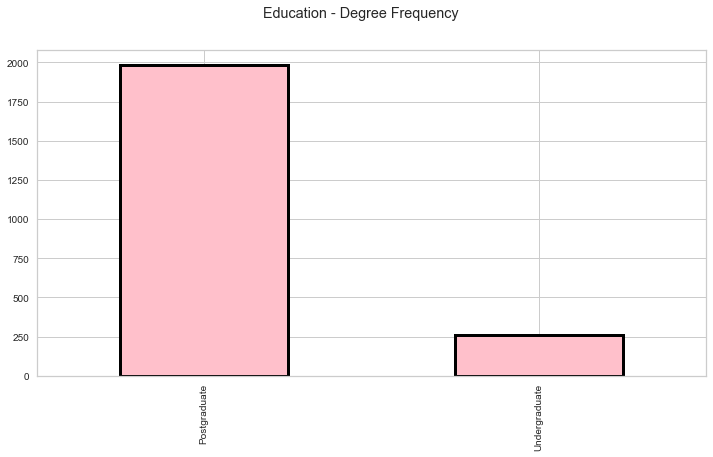

In [585]:
plt.figure(figsize=(12,6))
plt.suptitle('Education - Degree Frequency')
data['Education'].value_counts().plot(kind='bar',color = 'pink',edgecolor = "black",linewidth = 3)

<AxesSubplot:>

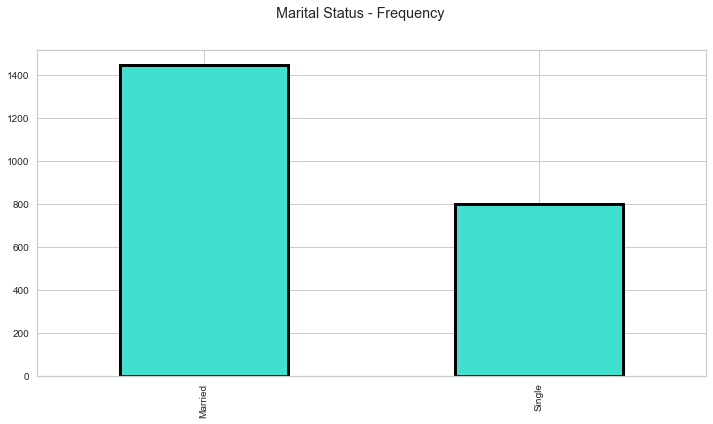

In [586]:
plt.figure(figsize=(12,6))
plt.suptitle('Marital Status - Frequency')
data['Marital_Status'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)

In [587]:
#Data Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [588]:
#Check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (2240, 32)


In [589]:
#Clean up object & date types to prep for modeling
#Create new feature called "Customer_for" to show the number of days the customers being the member of the shop. 
days = []
d1 = max(dates)

for i in dates:
    delta = d1 - i
    days.append(delta)
    
days[0]

datetime.timedelta(days=13)

In [590]:
days_int = []
for i in range(0, len(days)):
    days_int.append(days[i].days)  # with the method .days, we are able to get only the number of days from the timedelta type.
    
days_int[0]

13

In [591]:
data['Customer_for'] = days_int

In [592]:
model_data = data.copy()

In [593]:
#Select all the categorical variables
cat = []
for i in model_data.columns:
    if (model_data[i].dtypes == "object"):
        cat.append(i)
        
print("Categorical Variables",cat)

Categorical Variables ['Education', 'Marital_Status', 'Country', 'Has_Child']


In [594]:
#Encoding categorical labels
le=preprocessing.LabelEncoder()
for i in cat:
    model_data[i]=model_data[[i]].apply(le.fit_transform)
    
print("features converted to numerical")

features converted to numerical


In [596]:
#Delete Unnessary Columns
#Select variables to leave out
col_del = ['Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']

In [597]:
model_data = model_data.drop(col_del, axis=1)

In [598]:
#Scaling
scaler = StandardScaler()
scaler.fit(model_data)

scaled_data = pd.DataFrame(scaler.transform(model_data), columns=model_data.columns)
print("All features are now scaled")

All features are now scaled


In [599]:
model_data.tail()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Country,Age,Total_Spend,Total_AcceptedCmp,Children,Has_Child,Customer_for
2235,1976,0,1,66476,0,1,99,372,18,126,...,2,11,4,7,45,689,0,1,0,479
2236,1977,1,0,31056,1,0,99,5,10,13,...,0,3,8,6,44,55,0,1,0,523
2237,1976,0,1,46310,1,0,99,185,2,88,...,1,5,8,6,45,309,0,1,0,573
2238,1978,0,0,65819,0,0,99,267,38,701,...,4,10,3,3,43,1383,0,0,1,577
2239,1969,0,0,94871,0,2,99,169,24,553,...,5,4,7,1,52,1078,2,2,0,666


In [600]:
#Dimentionality Reduction #Principal Component Analysis(PCA)
#Increasing interpretability but at the same time minimizing information loss.
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_data = pd.DataFrame(pca.transform(scaled_data), columns=(["Education","Income", "Kidhome"]))
PCA_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Education,2240.0,2.973812e-18,2.850600,-5.640510,-2.605946,-0.814234,2.345158,7.832727
Income,2240.0,-8.723181e-18,1.703997,-4.641385,-1.396130,-0.007038,1.323425,5.511907
Kidhome,2240.0,2.071755e-17,1.376256,-4.617961,-0.923394,0.037656,0.946817,5.227657


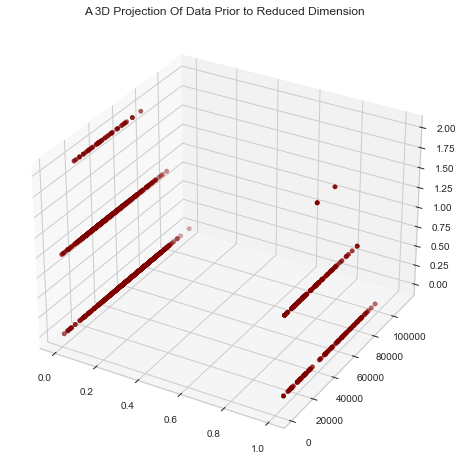

In [601]:
#A 3D Projection Of Data In The Reduced Dimension
x =model_data["Education"]
y =model_data["Income"]
z =model_data["Kidhome"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data Prior to Reduced Dimension")
plt.show()

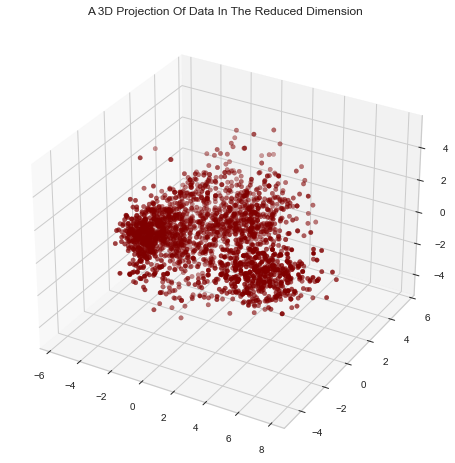

In [602]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_data["Education"]
y =PCA_data["Income"]
z =PCA_data["Kidhome"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

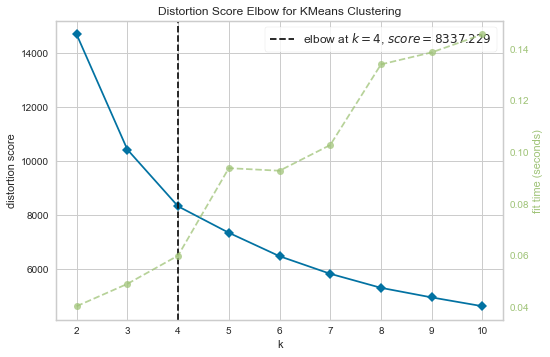

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [603]:
#K-means Clustering
#Choosing optimal k
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(PCA_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [615]:
#KMeans Clustering
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 #predict the labels of clusters
label1 = kmeans.fit_predict(PCA_data)
print(label)
#Add the cluster labels in the dataframe
PCA_data['Clusters_1'] = label1
data['Clusters_1'] = label1

[3 3 0 ... 2 3 1]


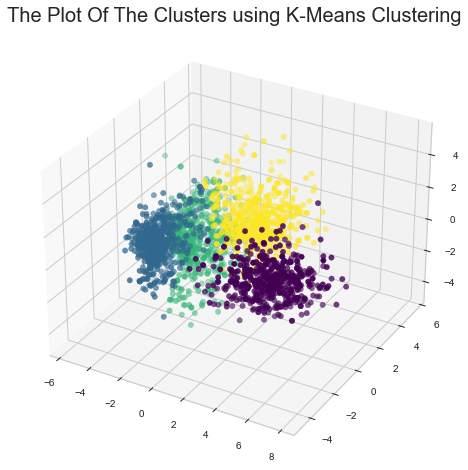

In [616]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=30, c=data["Clusters_1"], marker='o', cmap = 'viridis')
ax.set_title("The Plot Of The Clusters using K-Means Clustering", size = 20)
plt.show()

In [617]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
label2 = AC.fit_predict(PCA_data)
PCA_data["Clusters_2"] = label2
data["Clusters_2"] = label2

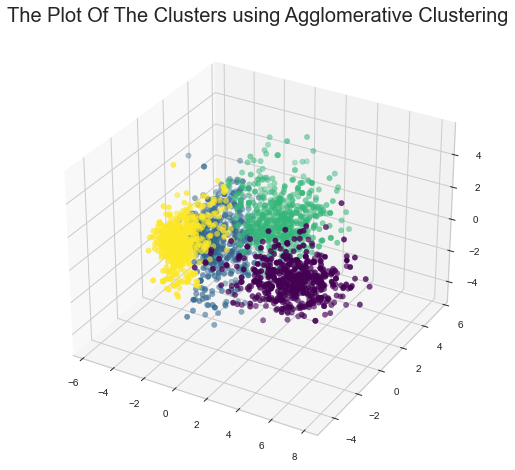

In [618]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=30, c=data["Clusters_2"], marker='o', cmap = 'viridis')
ax.set_title("The Plot Of The Clusters using Agglomerative Clustering", size = 20)
plt.show()


In [619]:
#DBSCAN
from sklearn.cluster import DBSCAN
#Initiating the BBSCAN Clustering model 
DP = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
label3 = DP.fit_predict(PCA_data)
#Adding the Clusters feature to the dataframe.
PCA_data["Clusters_3"]= label3
data["Clusters_3"]= label3

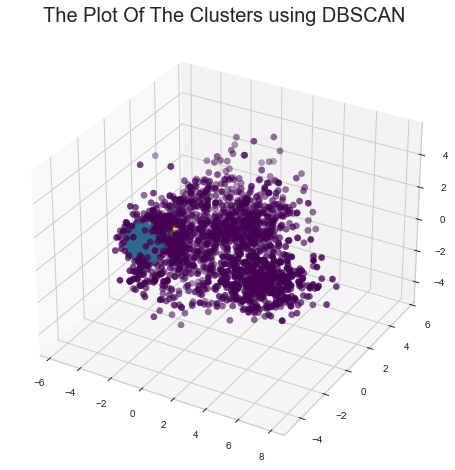

In [620]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=data["Clusters_3"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters using DBSCAN", size = 20)
plt.show()

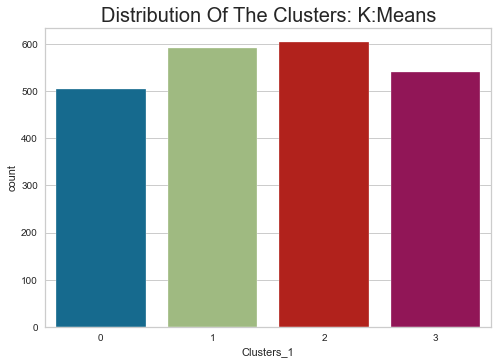

In [621]:
#Evaluating Models
#Plotting countplot of clusters
pl = sns.countplot(x=data["Clusters_1"])
pl.set_title("Distribution Of The Clusters: K:Means", size = 20)
plt.show()

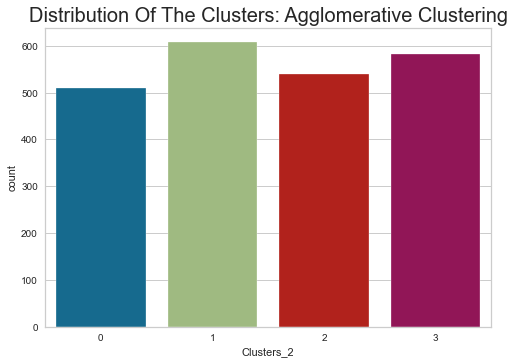

In [622]:
#Plotting countplot of clusters
pl = sns.countplot(x=data["Clusters_2"])
pl.set_title("Distribution Of The Clusters: Agglomerative Clustering", size = 20)
plt.show()

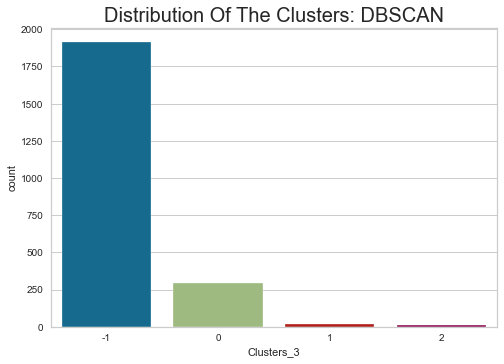

In [623]:
#Plotting countplot of clusters
pl = sns.countplot(x=data["Clusters_3"])
pl.set_title("Distribution Of The Clusters: DBSCAN", size = 20)
plt.show()

In [ ]:
#Based on the distrubution, i will go with K-Means for further profiling

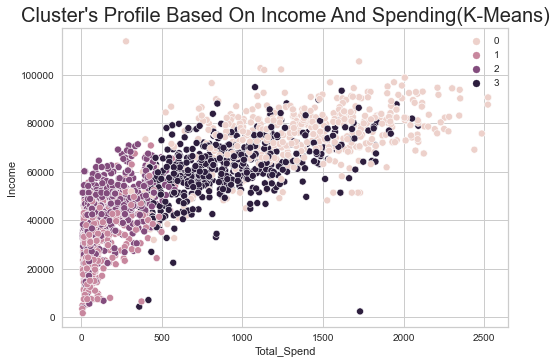

In [626]:
pl = sns.scatterplot(data = data,x= data["Total_Spend"], y= data["Income"],hue=data["Clusters_1"])
pl.set_title("Cluster's Profile Based On Income And Spending(K-Means)", size = 20)
plt.legend()
plt.show()

In [ ]:
#Income vs spending plot shows the clusters pattern

#group 0: high income & high spend
#group 1: low income & low spend
#group 2: average income & low spend
#group 3: average income & average spend  

C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


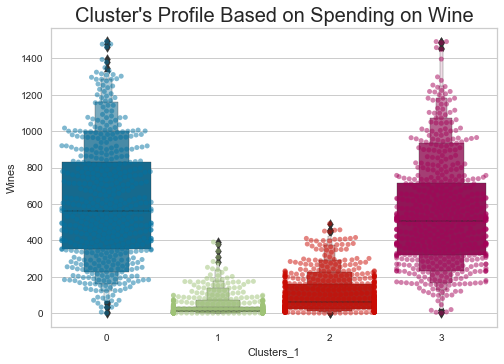

In [643]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters_1"], y=data["Wines"],  alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters_1"], y=data["Wines"])
pl.set_title("Cluster's Profile Based on Spending on Wine", size = 20)
plt.show()

C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


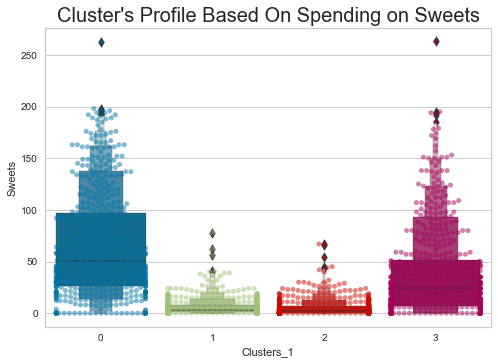

In [650]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters_1"], y=data["Sweets"],  alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters_1"], y=data["Sweets"])
pl.set_title("Cluster's Profile Based On Spending on Sweets", size = 20)
plt.show()

C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


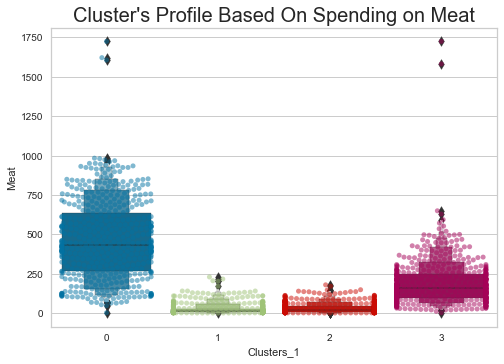

In [647]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters_1"], y=data["Meat"],  alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters_1"], y=data["Meat"])
pl.set_title("Cluster's Profile Based On Spending on Meat", size = 20)
plt.show()

C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


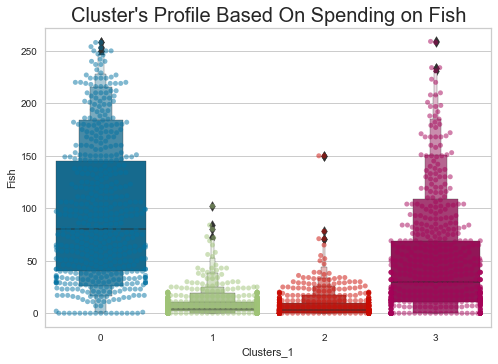

In [648]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters_1"], y=data["Fish"],  alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters_1"], y=data["Fish"])
pl.set_title("Cluster's Profile Based On Spending on Fish", size = 20)
plt.show()

C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


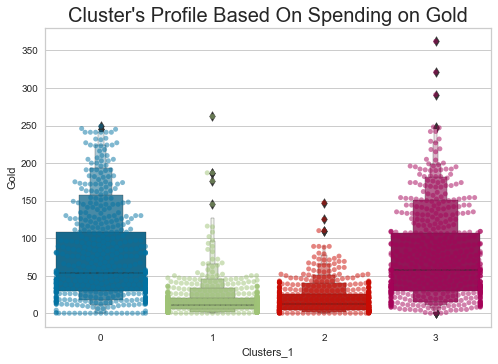

In [649]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters_1"], y=data["Gold"],  alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters_1"], y=data["Gold"])
pl.set_title("Cluster's Profile Based On Spending on Gold", size = 20)
plt.show()

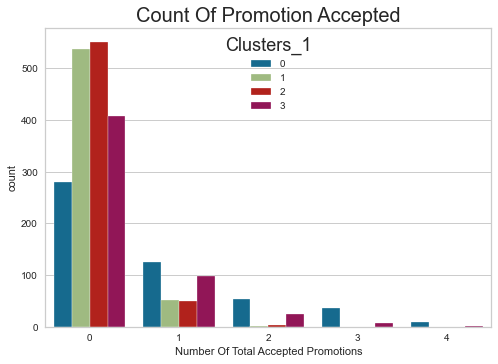

In [653]:
plt.figure()
pl = sns.countplot(x=data["Total_AcceptedCmp"],hue=data["Clusters_1"])
pl.set_title("Count Of Promotion Accepted", size = 20)
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

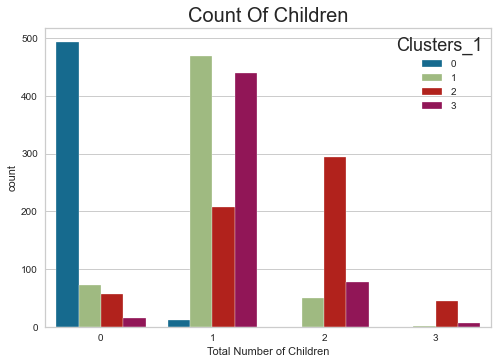

In [654]:
plt.figure()
pl = sns.countplot(x=data["Children"],hue=data["Clusters_1"])
pl.set_title("Count Of Children", size = 20)
pl.set_xlabel("Total Number of Children")
plt.show()

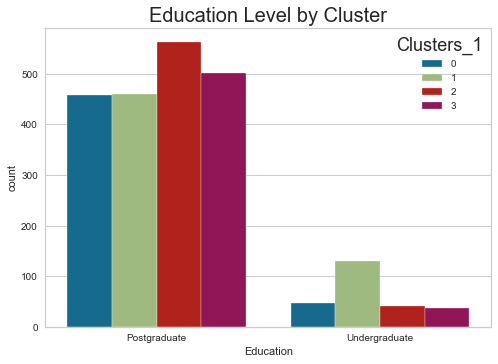

In [659]:
plt.figure()
pl = sns.countplot(x=data["Education"],hue=data["Clusters_1"])
pl.set_title("Education Level by Cluster", size = 20)
plt.show()

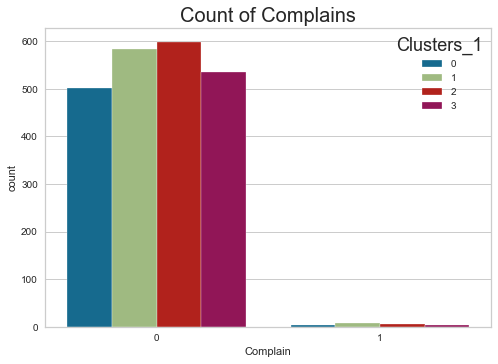

In [660]:
plt.figure()
pl = sns.countplot(x=data["Complain"],hue=data["Clusters_1"])
pl.set_title("Count of Complains", size = 20)
plt.show()

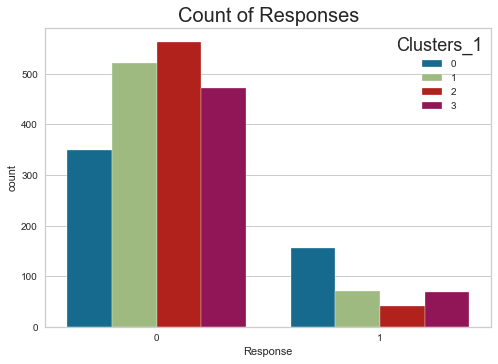

In [661]:
plt.figure()
pl = sns.countplot(x=data["Response"],hue=data["Clusters_1"])
pl.set_title("Count of Responses", size = 20)
plt.show()

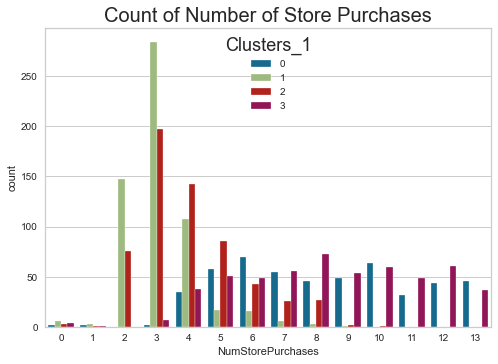

In [663]:
plt.figure()
pl = sns.countplot(x=data["NumStorePurchases"],hue=data["Clusters_1"])
pl.set_title("Count of Number of Store Purchases", size = 20)
plt.show()

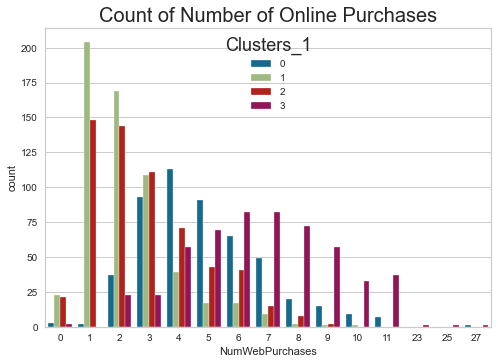

In [664]:
plt.figure()
pl = sns.countplot(x=data["NumWebPurchases"],hue=data["Clusters_1"])
pl.set_title("Count of Number of Online Purchases", size = 20)
plt.show()